# Network Analysis 

> Replication of the paper "*A new insight to the analysis of co-authorship in Google Scholar*" - Kalhor et al.

---





 

##Packages

In [ ]:
# run once at the beginning

#Install latest version of matplotlib (matplotlib-3.5.2) (necessary for drawing graphs)
!pip install -U matplotlib

# restart the kernel
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 29.2 MB/s 
     |████████████████████████████████| 944 kB 43.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import seaborn as sns
import networkx.algorithms.community as nx_comm
from matplotlib.lines import Line2D
from textwrap import wrap

sns.set_style('whitegrid')


In [ ]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


##Dataset import

In [ ]:
#Dataset Co-authorship from GitHub
url = 'https://github.com/jane1357z/network_files/blob/4a0a52e4eac622f62bd66e0a7804b4b62c72aace/co_authorship.csv?raw=true'
df_coauthorship = pd.read_csv(url, sep=',', header=0, engine='python')

#Dataset Attributes from GitHub
url = 'https://github.com/jane1357z/network_files/blob/4a0a52e4eac622f62bd66e0a7804b4b62c72aace/users_attributes.csv?raw=true'
df_attributes = pd.read_csv(url, sep=',', header=0, engine='python')  #change of column name from "user_id" to "source_id"

#Dataset Fields of Interest from GitHub
url = 'https://github.com/jane1357z/network_files/blob/4a0a52e4eac622f62bd66e0a7804b4b62c72aace/users_fields_no_commas.csv?raw=true'
df_fields = pd.read_csv(url, sep=',', header=0, engine='python')     # quotation marks were removed from original dataset



---



#EDA 🔍

## Exploratory Data Analysis - Co-authorship

In [ ]:
#Summary statistics of numerical columns
print(f"{df_coauthorship.describe()}\n")

#Shape of object types 
print(f"{df_coauthorship.info()}\n")

           source_id     target_id
count         307364        307364
unique        134113        134113
top     yAXdVbMAAAAJ  yAXdVbMAAAAJ
freq              34            34

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307364 entries, 0 to 307363
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   source_id  307364 non-null  object
 1   target_id  307364 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB
None



In [ ]:
#Distribution of user source IDs
source_counts = df_coauthorship["source_id"].value_counts()
top_sources = source_counts.nlargest(n=3)
bottom_sources = source_counts.nsmallest(n=3)
print(
    f"Overview source counts:\n{source_counts.describe()}\n"
    f"Most popular sources:\n{top_sources}\n"
    f"Least popular sources:\n{bottom_sources}\n"
)

#Distribution of user target IDs
target_counts = df_coauthorship["target_id"].value_counts()
top_targets = source_counts.nlargest(n=3)
bottom_targets = source_counts.nsmallest(n=3)
print(
    f"Overview target counts:\n{source_counts.describe()}\n"
    f"Most popular targets:\n{top_sources}\n"
    f"Least popular targets:\n{bottom_sources}\n"
)

#Check if top source and top target IDs overlap
if list(top_sources) == list(top_targets):
  print("Top sources equal top targets")
else:
  print("Top sources differ from top targets")

Overview source counts:
count    134113.000000
mean          2.291829
std           1.895053
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          34.000000
Name: source_id, dtype: float64
Most popular sources:
yAXdVbMAAAAJ    34
TxKNCSoAAAAJ    32
hiQnvicAAAAJ    29
Name: source_id, dtype: int64
Least popular sources:
wrd8TMsAAAAJ    1
LHUMJ2UAAAAJ    1
VbUIo-QAAAAJ    1
Name: source_id, dtype: int64

Overview target counts:
count    134113.000000
mean          2.291829
std           1.895053
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          34.000000
Name: source_id, dtype: float64
Most popular targets:
yAXdVbMAAAAJ    34
TxKNCSoAAAAJ    32
hiQnvicAAAAJ    29
Name: source_id, dtype: int64
Least popular targets:
wrd8TMsAAAAJ    1
LHUMJ2UAAAAJ    1
VbUIo-QAAAAJ    1
Name: source_id, dtype: int64

Top sources equal top targets


In [ ]:
#Attributes and fields of top 3 target and source IDs
top_ids_attributes = df_attributes.loc[df_attributes["source_id"].isin(top_sources.index)]
top_ids_fields = df_fields.loc[df_fields["source_id"].isin(top_sources.index)]
top_ids_info = pd.merge(
    top_ids_attributes, 
    top_ids_fields, 
    on = "source_id"
)
print(top_ids_info)

      source_id         university_id  Citations_all  h-index_all country  \
0  yAXdVbMAAAAJ  15740069453547300377           6774           35      CN   
1  TxKNCSoAAAAJ  16354744476947292444          36675           86      DE   
2  hiQnvicAAAAJ  10568258639230347370           4419           34      TR   

  gender             field  
0   male  Computer Science  
1   male  Computer Science  
2   male  Computer Science  


In [ ]:
#Compare source counts with target counts
all_users_counts = pd.concat([source_counts, target_counts], axis=1)
if all_users_counts["source_id"].equals(all_users_counts["target_id"]):
    print("All authors appear the same number of times as source and target")
else:
    print("Authors do not appear the same number of times as source and target")

All authors appear the same number of times as source and target


##Exploratory Data Analysis - Fields

In [ ]:
#Summary statistics of numerical columns
print(f"{df_fields.describe()}\n")

#Shape of object types 
print(f"{df_fields.info()}\n")

           source_id             field
count         850827            808737
unique        850827                40
top     QcRldecAAAAJ  Computer Science
freq               1            133993

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850827 entries, 0 to 850826
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   source_id  850827 non-null  object
 1   field      808737 non-null  object
dtypes: object(2)
memory usage: 13.0+ MB
None



In [ ]:
#Exclude authors without a field
df_fields_clean = df_fields[df_fields["field"].notna()]

#Summary statistics of cleaned dataset
print(f"Cleaned dataset:\n{df_fields_clean.describe()}")

Cleaned dataset:
           source_id             field
count         808737            808737
unique        808737                40
top     QcRldecAAAAJ  Computer Science
freq               1            133993


Overview distribution of fields:
count        40.000000
mean      20218.425000
std       26409.393063
min           3.000000
25%        1854.750000
50%       14956.000000
75%       24611.250000
max      133993.000000
Name: field, dtype: float64

Least popular fields:
interdisciplinary-events      3
Computational Mechanics     143
Automotive Engineering      168
Name: field, dtype: int64

Most popular fields:
Computer Science: 133993/808737 users (16.57% of users)
Physics and Astronomy: 71319/808737 users (8.82% of users)
Agricultural and Biological Sciences: 65255/808737 users (8.07% of users)
Sum relative shares: 33.46%



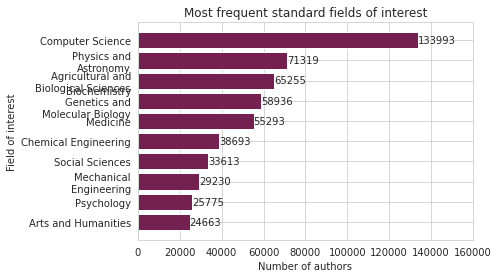

In [ ]:
#Distribution of standard fields of interest
fields_counts = df_fields_clean["field"].value_counts().sort_values(ascending = False)
print(f"Overview distribution of fields:\n{fields_counts.describe()}\n")

#Least popular fields
bottom_fields = fields_counts.nsmallest(n=3) 
print(f"Least popular fields:\n{bottom_fields}\n")

#Absolute and relative frequency of most popular fields
print("Most popular fields:")
top_fields = fields_counts.nlargest(n=3)
top_fields_rel = 0
for field in top_fields.index:
    field_abs = fields_counts.loc[field]
    field_rel = field_abs/fields_counts.sum()*100
    top_fields_rel += field_rel
    print(
        f"{field}: {field_abs}/{fields_counts.sum()} users "
        f"({round(field_rel, 2)}% of users)"
    )
print(f"Sum relative shares: {round(top_fields_rel, 2)}%\n")

#Visualize distribution of fields in barchart
labels = ['\n'.join(wrap(l, 20)) for l in list(fields_counts.iloc[:10].index)]
values = list(fields_counts.iloc[:10])
bars = plt.barh(labels, values, color = "#742151")
plt.bar_label(container = bars)
plt.gca().invert_yaxis()
plt.xlim(0, 160000)
plt.xlabel("Number of authors")
plt.ylabel("Field of interest")
plt.title("Most frequent standard fields of interest")
plt.show()

In [ ]:
#List of fields mentioned by Kalhor et al. (2022)
fields_paper = [
    "Aerospace Engineering", "Agricultural and Biological Sciences", "Arts and Humanities",
    "Automotive Engineering", "Biochemistry Genetics and Molecular Biology",
    "Biomedical Engineering", "Building and Construction", 
    "Business Management and Accounting", "Chemical Engineering", "Chemistry",
    "Civil and Structural Engineering", "Computational Mechanics", "Computer Science",
    "Control and Systems Engineering", "Dentistry", "Earth and Planetary Sciences",
    "Economics Econometrics and Finance", "Electrical and Electronic Engineering",
    "Energy", "Environmental Science", "Health Professions", 
    "Immunology and Microbiology", "Industrial and Manufacturing Engineering",
    "Interdisciplinary Events", "interdisciplinary-events", "Materials Science", 
    "Mathematics", "Mechanical Engineering", "Mechanics of Materials",
    "Media Technology", "Medicine", "Neuroscience", "Nursing", "Ocean Engineering",
    "Pharmacology Toxicology and Pharmaceutics", "Physics and Astronomy", "Psychology",
    "Safety Risk Reliability and Quality", "Social Sciences", "Veterinary"
]

#Identify fields that Kalhor et al. (2022) left out in the paper
extra_fields = [field for field in set(df_fields["field"]) if field not in fields_paper]
print(f"Extra fields: {extra_fields}")

#Exclude fields not mentioned in the paper
df_fields_edited = df_fields.loc[df_fields["field"].isin(fields_paper)]

#Summary statistics of dataset without fields not mentioned in the paper
print(
    f"Fields dataset excluding fields not mentioned in paper "
    f"(i.e., 'Engingeering (miscellaneous)', nan)\n{df_fields_edited.describe()}")

Extra fields: [nan, 'Engineering (miscellaneous)']
Fields dataset excluding fields not mentioned in paper (i.e., 'Engingeering (miscellaneous)', nan)
           source_id             field
count         805835            805835
unique        805835                39
top     QcRldecAAAAJ  Computer Science
freq               1            133993


## Exploratory Data Analysis - Attributes

In [ ]:
#Function for creating autopct arguments (i.e., values of slices in pie chart)
def autopct_args(pct, values):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return "{p:.2f}%  ({v:d})".format(p=pct,v=val)

In [ ]:
#Summary statistics of numerical columns
print(f"{df_attributes.describe()}\n")

#Shape of object types
print(f"{df_attributes.info()}\n")

#Unique values per column
attributes_uniqueval = df_attributes.nunique()
print(f"Unique values per column:\n{attributes_uniqueval}\n")

       university_id  Citations_all    h-index_all
count   5.569320e+05   5.569320e+05  556932.000000
mean    9.195048e+18   3.280476e+03      18.913496
std     5.316114e+18   9.537221e+03      18.005313
min     9.878469e+15   1.000000e+00       1.000000
25%     4.497257e+18   2.220000e+02       7.000000
50%     9.160473e+18   8.210000e+02      14.000000
75%     1.379692e+19   2.734000e+03      25.000000
max     1.844058e+19   1.092925e+06     314.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556932 entries, 0 to 556931
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   source_id      556932 non-null  object
 1   university_id  556932 non-null  uint64
 2   Citations_all  556932 non-null  int64 
 3   h-index_all    556932 non-null  int64 
 4   country        556932 non-null  object
 5   gender         556932 non-null  object
dtypes: int64(2), object(3), uint64(1)
memory usage: 25.5+ MB
None

Unique val

Gender distribution:
male      386408
female    170524
Name: gender, dtype: int64



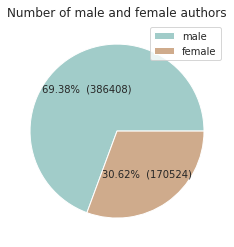

In [ ]:
#Distribution of gender
gender_counts = df_attributes["gender"].value_counts()
print(f"Gender distribution:\n{gender_counts}\n")

#Visualize gender distribution in pie chart
plt.pie(
    gender_counts, #slices
    autopct = lambda pct: autopct_args(pct, gender_counts), #label
    colors = ["#A1CCC9", "#CFAB8C"] #color
)
plt.title("Number of male and female authors")
plt.legend(labels = gender_counts.index)
plt.show()

Overview country counts:
count       226.000000
mean       2464.300885
std        9537.287703
min           1.000000
25%           5.000000
50%          72.000000
75%        1008.250000
max      118705.000000
Name: country, dtype: float64
Least popular countries:
AI    1
CX    1
FM    1
Name: country, dtype: int64

Most popular countries:
US: 118705/556932 users (21.31% of users)
CN: 42869/556932 users (7.7% of users)
IN: 36823/556932 users (6.61% of users)
Most popular countries (sum of relative share):
35.62319995977965



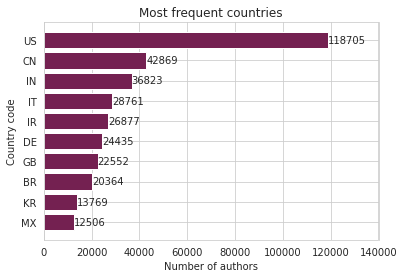

In [ ]:
#Distribution of countries
country_counts = df_attributes["country"].value_counts().sort_values(ascending = False)
print(f"Overview country counts:\n{country_counts.describe()}")

#Least popular countries
bottom_countries = country_counts.nsmallest(n=3)
print(f"Least popular countries:\n{bottom_countries}\n")

#Absolute and relative frequency of most popular countries
print("Most popular countries:")
top_countries = country_counts.nlargest(n=3)
top_countries_rel = 0
for country in top_countries.index:
    country_abs = country_counts.loc[country]
    country_rel = country_abs/country_counts.sum()*100
    top_countries_rel += country_rel
    print(
        f"{country}: {country_abs}/{country_counts.sum()} users "
        f"({round(country_rel, 2)}% of users)"
    )
print(f"Most popular countries (sum of relative share):\n{top_countries_rel}\n")

#Visualize distribution of countries in Barchart
bars = plt.barh(
    list(country_counts.iloc[:10].index), #label
    list(country_counts.iloc[:10]), #bar 
    color = "#742151"#style,
)
plt.bar_label(container = bars)
plt.gca().invert_yaxis()
plt.xlim(0, 140000)
plt.xlabel("Number of authors")
plt.ylabel("Country code") 
plt.title("Most frequent countries")
plt.show()

In [ ]:
#Distribution of universities
uni_counts = df_attributes["university_id"].value_counts()
print(f"University counts:\n{uni_counts.describe()}")

University counts:
count    5752.000000
mean       96.824061
std       280.659990
min         1.000000
25%         8.000000
50%        20.000000
75%        62.000000
max      4998.000000
Name: university_id, dtype: float64


#MACN - Graph Visualization ⛄

In [ ]:
n_cut = 300 # slicing dataset: number of rows to build the graphs

df_authors = df_coauthorship.iloc[0:n_cut, :] # dataset used to build the graph

In [ ]:
### define the unique authors of the cut dataset and match them to the field
# authors_list = []
# for el in df_authors.source_id.unique():
#     authors_list.append(el)
# for el in df_authors.target_id.unique():
#     authors_list.append(el)
# authors_list = list(set(authors_list))

# author_field = []
# for j in range(len(df_fields)):
#     x = df_fields.loc[j][0]
#     if x in authors_list:
#         author_field.append([x,df_fields.loc[j][1]])

### create new csv file and upload to github
# df_author_fields = pd.DataFrame(author_field, columns=['author', 'field'])
# df_author_fields.to_csv("author_fields_graph.csv", sep=',', encoding='cp1251')

### use the created dataset from github
url = 'https://github.com/jane1357z/network_files/blob/fd16f5ea896f5498dc3305e255d449e9061a32a8/author_fields_graph.csv?raw=true'
df_author_fields = pd.read_csv(url, sep=',', header=0, engine='python')

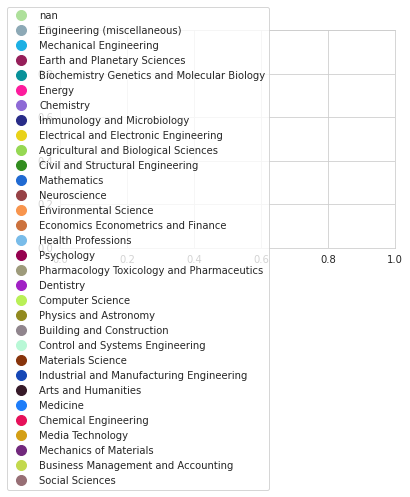

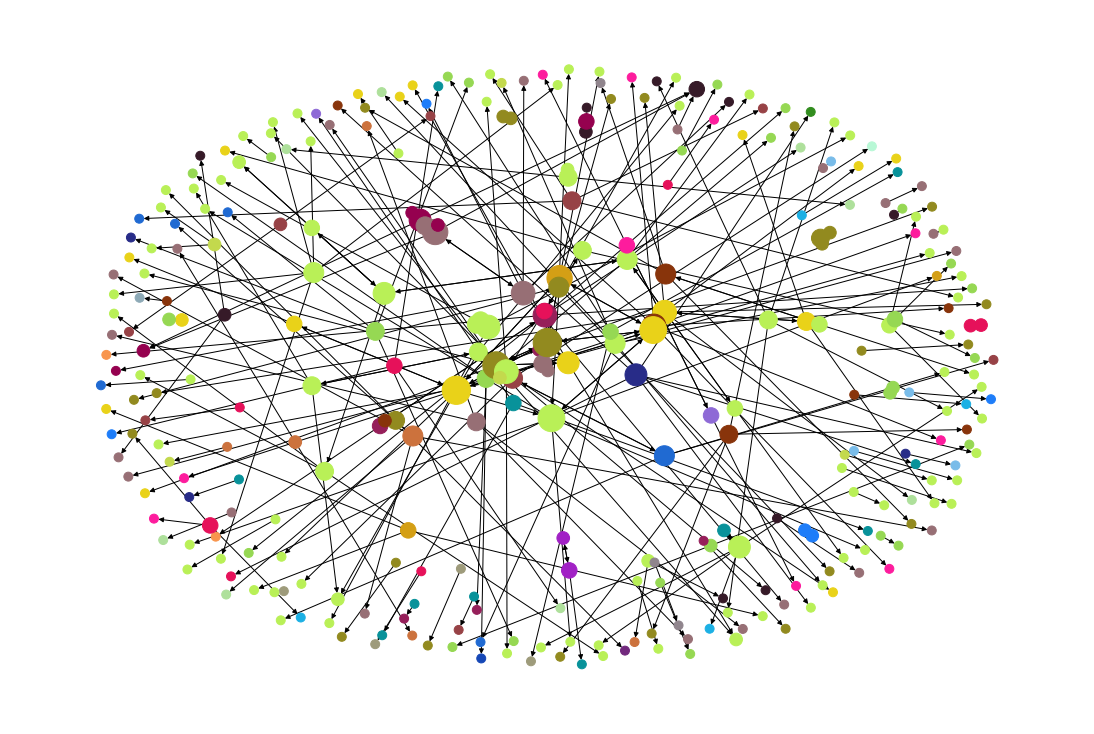

In [ ]:
# convert (r,g,b) to HEX
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

# create list of fields
authors = df_author_fields['author'].to_list()
fields_list = df_author_fields['field'].to_list()
fields_list_unique = list(set(fields_list))

# set random colors
colors = []
for i in range(len(fields_list_unique)):
    colors.append(rgb2hex(random.randint(0,255), random.randint(0,255), random.randint(0,255)))

# define and fill the network
g_kalhor = nx.empty_graph(0, nx.DiGraph())

columns = list(df_authors.columns.values)
for i in range(len(columns)-1):
    g_kalhor.add_edges_from(zip(df_authors[columns[i]], df_authors[columns[i+1]]))

# match the field of interest with color to paint each node
graph_colors = []
for r,v in g_kalhor.nodes(data=True):
    ind_author = authors.index(r)
    field_name = fields_list[ind_author]
    ind_field = fields_list_unique.index(field_name)
    graph_colors.append(colors[ind_field])
        
# create the legend
l_ones = []
for i in range(len(fields_list_unique)):
    l_ones.append(1)
    fields_list_unique[i] = str(fields_list_unique[i])

legend_elements = []
for i in range(len(colors)):
    legend_elements.append(Line2D([0], [0], marker='o', color=colors[i], label=fields_list_unique[i], lw=0, markerfacecolor=colors[i], markersize=10))
ax = plt.gca()
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0.173,1.13))

# count degree to set the size of node
dg = g_kalhor.degree()
dg = np.array([dg[n] for n in g_kalhor.nodes])
plt.figure(clear=True,frameon=False, figsize=(15,10)) 
nx.draw(g_kalhor, with_labels=False, node_size=dg*80, arrows=True, node_color=graph_colors)

# plot the graph
plt.show()

# MACN - Building 🎯

In [ ]:
#Network built - directed unweighted network of co-authors
g = nx.from_pandas_edgelist(df_coauthorship, source='source_id',
                            target='target_id', create_using=nx.DiGraph())

In [ ]:
#Added attributes to nodes from both files (fields + attributes)
nodes_attr = df_fields.set_index('source_id').to_dict(orient = 'index')
nx.set_node_attributes(g, nodes_attr)

nodes_attr = df_attributes.set_index('source_id').to_dict(orient = 'index')
nx.set_node_attributes(g, nodes_attr)

#Added node degree as attribute to node  
  #The node degree is the number of edges adjacent to the node. 
node_degree=dict(g.degree())
nx.set_node_attributes(g, node_degree, 'node_degree')

In [ ]:
#Check Attributes in nodes and
#Node with the largest node degree
max(dict(g.nodes).items(), key=lambda x: x[1]['node_degree'])

('yAXdVbMAAAAJ',
 {'Citations_all': 6774,
  'country': 'CN',
  'field': 'Computer Science',
  'gender': 'male',
  'h-index_all': 35,
  'node_degree': 68,
  'university_id': 15740069453547300377})

##Preliminary analysis of Network

In [ ]:
#Network preliminary analysis
print("Type :" , type(g))
print("Graph is directed:" , g.is_directed())
print("Egdes :" , g.number_of_edges()) 
print("Nodes :" , g.number_of_nodes()) 
print("K-core :" , nx.k_core(g, k=None, core_number=None))  #K-core of a unweighted network - is the maximal subgraph where all vertices have degree at least k
print(min(node_degree.values()))

Type : <class 'networkx.classes.digraph.DiGraph'>
Graph is directed: True
Egdes : 307364
Nodes : 134113
K-core : DiGraph with 15 nodes and 92 edges
2


#MACN - Network Metrics 🧮

###Finding Communities
-using [Clauset-Newman-Moore greedy modularity maximization](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html)

-the paper build a correlation table with 3 features




In [ ]:
#Find communities in G using greedy modularity maximization 
g_communities = list(nx_comm.greedy_modularity_communities(g))

In [ ]:
#Add community to each node as an attribute
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
#using function
set_node_community(g, g_communities)

In [ ]:
#check community being added as attribute at a random node
list(g.nodes(data=True))[2]

('rcW8mi0AAAAJ',
 {'Citations_all': 153,
  'community': 3,
  'country': 'BR',
  'field': 'Computer Science',
  'gender': 'female',
  'h-index_all': 4,
  'node_degree': 6,
  'university_id': 6411711566900187963})

####Size of Communities (number of authors) 



In [ ]:
#Total number of communities in MACN
print("Total number of communities in MACN:", len(g_communities))

Total number of communities in MACN: 15356


In [ ]:
#Number of authors within each community (Nodes and their community size)
def node_comm_size(communities):
    return [[list(x),len(x)] for x in communities]

#Run function to get nodes in a community and community size
ncs = node_comm_size(g_communities)

####Mean citation count of each Community

In [ ]:
#Extract community and citation number from MACN

#list of nodes and communities
comm = list(g.nodes(data =("community")))

#list of nodes and citations
cit = list(g.nodes(data =("Citations_all")))

####Mean h-index of each Community

In [ ]:
#Extract citation number from MACN

#list of nodes and h-index
hindex = list(g.nodes(data =("h-index_all")))

#### Bivariate relationship between communities´ attributes 
- Graph PairGrid Pearson Coorelation

In [ ]:
#Extract all previous information of communities in Dataframe for correlation

#create dataframe with node community size (ncs) and explode by Nodes
comm_size_df = pd.DataFrame(ncs, columns=["Node","Community Size"]).explode('Node')

#Merged Dataframe of nodes, community and CITATION count
comm_df = pd.DataFrame(comm, columns=['Node','Community'])  #community
cit_df= pd.DataFrame(cit, columns=['Node','Citation'])     #citation
comm_cit_df = comm_df.merge(cit_df, how='inner', on='Node') #community & citation

#Caculation of average CITATION by groupby community
avg_cit = comm_cit_df.groupby(['Community']).mean()

#Merged Dataframe of nodes, community and H-INDEX
hindex_df= pd.DataFrame(hindex, columns=['Node','H-index'])
comm_hindex_df = comm_df.merge(hindex_df, how='inner', on='Node')

#Calculation of average H-INDEX by groupby community
avg_hindex = comm_hindex_df.groupby(['Community']).mean()

#Merged calculations 
averages_df = avg_cit.merge(avg_hindex,how='inner', on='Community')

#Dataframe with all node, community and 3 variables
comm_cit_size_df = comm_cit_df.merge(comm_size_df, how='left', on='Node' )
comm_cit_size_hindex_df = comm_cit_size_df.merge(comm_hindex_df,  how='left', on=['Node', "Community"])

#Group by Community number and calculate mean values
all_df = comm_cit_size_hindex_df.groupby(['Community']).mean()

#log values of the attributes of the communities
all_df_log = np.log10(all_df[["Community Size", 'Citation',"H-index"]])
all_df_log = all_df_log[["Community Size", "Citation", "H-index"]]
print(all_df_log.describe())

       Community Size      Citation       H-index
count    15356.000000  13291.000000  13291.000000
mean         0.441726      2.831538      1.079084
std          0.291115      0.606545      0.289198
min          0.301030      0.301030      0.000000
25%          0.301030      2.444045      0.903090
50%          0.301030      2.850033      1.079181
75%          0.477121      3.243534      1.278754
max          3.759743      5.289121      2.256477


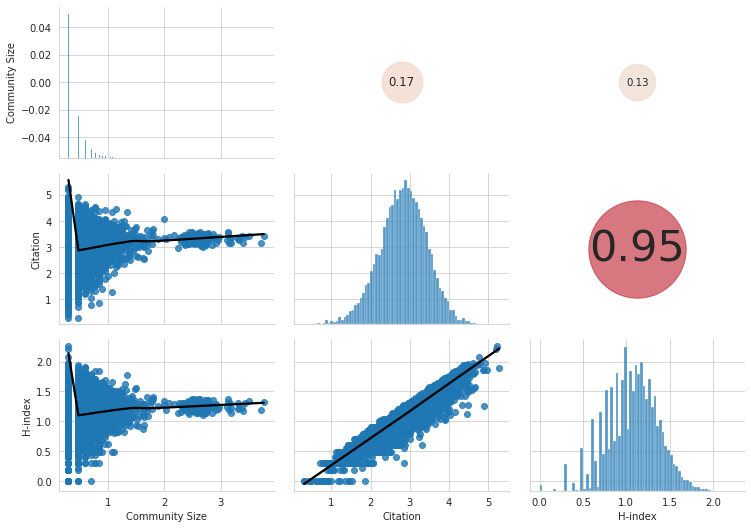

In [ ]:
#Correlation calculation and plot
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}"
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

h = sns.PairGrid(all_df_log, aspect=1.4, diag_sharey=False, dropna=True)
h.map_lower(sns.regplot, lowess=True, line_kws={'color': 'black'})
h.map_diag(sns.histplot)
h.map_upper(corrdot)



---



###Assortativity Coefficient for different attributes



Assortativity measures the similarity of connections in the graph with respect to the given attribute (table in paper)




In [ ]:
#Assortavity by Attributes

print("fields:", nx.attribute_assortativity_coefficient(g, "field"))
print("h-index_all:", nx.attribute_assortativity_coefficient(g, "h-index_all"))
print("country:", nx.attribute_assortativity_coefficient(g, "country"))
print("university_id:", nx.attribute_assortativity_coefficient(g, "university_id"))
print("Citations_all:", nx.attribute_assortativity_coefficient(g, "Citations_all"))
print("gender:", nx.attribute_assortativity_coefficient(g, "gender"))
print("node_degree:", nx.attribute_assortativity_coefficient(g, "node_degree"))

fields: 0.3926126008463361
h-index_all: 0.038266331671277805
country: 0.20096955056724083
university_id: 0.1842701258364324
Citations_all: 0.02942974534832482
gender: 0.1039437359205739
node_degree: 0.04248856545512028




---



###ERGM coefficients
-too complex to calculate, using external algorithm and MCMC sampling



---



###Structural metrics of the MACN

####Reciprocity (both directions)
-the ratio of the number
of edges pointing in both directions to the total number of edges in the network
(Costa et al. 2007).

In [ ]:
nx.reciprocity(g)

1.0

In [ ]:
nx.reciprocity(g_kalhor)

0.2866666666666667

#### Largest Weakly connected component of the MACN

Use only the largest weakly connected component of the MACN to calculate clustering coefficient and average shortest path length (Kalhor et al.)

In [ ]:
#Largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(g), key=len)

In [ ]:
#Subgraph of the largest weakly connected component
max_wcc = nx.subgraph(g, largest_wcc)

In [ ]:
print("Largest WCC Nodes :" , max_wcc.number_of_nodes())

Largest WCC Nodes : 89474


#####Average clustering coefficient of a network
-measures the degree to which
nodes intend to cluster together

In [ ]:
#Clustering coefficient of the weakly connected component of the MACN
nx.average_clustering(max_wcc, weight=None, count_zeros=True)

0.16028181036919567

##### Average shortest path length
-is the sum of path lengths d(u,v) between all pairs of nodes (assuming the length is zero if v is not reachable from v) normalized by n*(n-1) where n is the number of nodes in G.

Cannot compute average shortest path length because the largest weakly connected component is too large. For this reason we decided to calculate the shortest path lengths starting from a node (with most frequency, "yAXdVbMAAAAJ")

In [ ]:
#List of path lengths from a node source
shortest_path_lenght = dict(nx.shortest_path_length(g, source="yAXdVbMAAAAJ"))

In [ ]:
#Average of the path lenghts from the node source="yAXdVbMAAAAJ"
avg_of_values = sum(shortest_path_lenght.values()) / len(shortest_path_lenght.values())
print('Average of values: ', avg_of_values)

Average of values:  11.354069338578805




---



##MACN - Centrality Metrics
-In the paper no centrality metrics were calculated for the MACN but yes for the FIN. However, we do not have the dataset for the FINetwork. 

In [ ]:
#Computing Degree centrality (Normalized)
#The degree centrality for a node v is the fraction of nodes it is connected to.
degCent = nx.degree_centrality(g)

#Top 10 nodes in Descending order sorting centrality
degCent_top=(sorted(degCent.items(), key=lambda item: item[1], reverse=True)[0:5])
degCent_top

[('yAXdVbMAAAAJ', 0.0005070388928656646),
 ('TxKNCSoAAAAJ', 0.0004772130756382725),
 ('hiQnvicAAAAJ', 0.00043247434979718446),
 ('QY-earAAAAAJ', 0.00040264853256979244),
 ('0LjUNAsAAAAJ', 0.00040264853256979244)]

In [ ]:
#Computing PageRank
pagerank = nx.pagerank(g)
pagerank_top=(sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[0:5])
pagerank_top

[('yAXdVbMAAAAJ', 6.17408660411191e-05),
 ('TxKNCSoAAAAJ', 6.140759365773238e-05),
 ('u-3IgpkAAAAJ', 5.517938768105666e-05),
 ('QY-earAAAAAJ', 5.4268257099641384e-05),
 ('apugsswAAAAJ', 5.2880972864968464e-05)]

In [ ]:
#Computing Eigenvector
eigenvector = nx.eigenvector_centrality(g)
eigenvector_top=(sorted(eigenvector.items(), key=lambda item:item[1], reverse=True)[0:5])
eigenvector_top

[('VVBfGMYAAAAJ', 0.27834046423917647),
 ('4kwCpCcAAAAJ', 0.26719808166958453),
 ('7B58FysAAAAJ', 0.26329410308196244),
 ('W37CtAwAAAAJ', 0.24530343416222214),
 ('9HNtvo0AAAAJ', 0.2221931174330523)]



---



##MACN-subgraph - Centrality Metrics
-These metrics took too long to calculate for MACN because they measure short paths. Therefore we are using the graph created for the visualization (g_kalhor).

In [ ]:
#Computing betweenness
betCent = nx.betweenness_centrality(g_kalhor)

#Descending order sorting betweeness
betCent_top=(sorted(betCent.items(), key=lambda item: item[1], reverse=True)[0:5])
betCent_top

[('S8mtOroAAAAJ', 0.00063399716565973),
 ('FOfDj5gAAAAJ', 0.0004102334601327665),
 ('cPCHycsAAAAJ', 0.00036361602148131573),
 ('GInxaQUAAAAJ', 0.00032632207056015514),
 ('lkT2r3UAAAAJ', 0.00028902811963899455)]

In [ ]:
#Computing Closeness
closeness = nx.closeness_centrality(g_kalhor)
closeness_top=(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[0:5])
closeness_top

[('S8mtOroAAAAJ', 0.01659891598915989),
 ('eWMHaQcAAAAJ', 0.014939024390243902),
 ('FOfDj5gAAAAJ', 0.014939024390243902),
 ('7p7WZZoAAAAJ', 0.013580931263858094),
 ('-i0BbDgAAAAJ', 0.013580931263858094)]